In [ ]:
 pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_hub as hub

In [ ]:
import random
import string
import math
import itertools
import os
import cv2
import numpy as np
import imgaug
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
assert tf.test.is_gpu_available()
from google.colab import drive
from google.colab.patches import cv2_imshow
import json
import glob

In [ ]:
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
#cria uma instancia do objeto recognizer
recognizer = keras_ocr.recognition.Recognizer()
#compila o modelo 
recognizer.compile()

Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
#cria lita contendo o caminho das imagens(image list) e uma lista com o caminho do json(jsonlist)
caminho = '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/'
json_list = glob.glob('/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/*.json')
image_list = glob.glob('/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/*.png')


In [ ]:
#retorna os 3 primeiros elementos de json list 
json_list[:3]

['/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1000.json',
 '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1001.json',
 '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1002.json']

In [ ]:

print(image_list)#imprime o conteudo da lista image_list
lista_treino = []
for i in range(len(json_list)):#itera sobre os índices da lista json_list, permitindo acessar cada arquivo JSON.
  arq = open(json_list[i],'rt', encoding='utf-8')#abre o arquivo json
  dados = json.load(arq)# Os dados JSON são carregados a partir do arquivo usando a função json.load(). Isso converte o conteúdo do arquivo em uma estrutura de dados Python.
  img_name = dados['imagePath']#extrai o caminho dos arv json e adiciona no image name 
  img_path = "/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/"#
  if(img_path+img_name in image_list):# verifica se a concatenação de img_path e img_name está presente na lista image_list.
    lista_treino.append((img_path+img_name,None,dados['shapes'][0]['label'].lower()))#uma tupla contendo o caminho completo da imagem, None (indicando a ausência de rótulo) e o rótulo extraído dos dados JSON é adicionada à lista_treino
  arq.close()


['/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1496.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1435.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1455.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1474.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1492.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1486.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1493.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1460.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1476.png', '/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_

In [ ]:
#pega a lista_treino que é uma lista de tupla e extrai somente a ultima string e salva na variavél resultado 
def pegar_ultima_string(lista_de_tuplas):
    ultimas_strings = []
    for tupla in lista_de_tuplas:
        ultima_string = tupla[-1]
        ultimas_strings.append(ultima_string)
    return ultimas_strings

labels_treino = pegar_ultima_string(lista_treino)
print(labels_treino)


['jb605033', 'zd55p0', '9bf', '8afar23lxlj199965', '9bfze16p5989895794', '30212244', '308', '93hfb255', '9bd118181', 'c1187329', '93zc42c01d446512', '93hfc2630lz', '09', '98867515t', '94', 'nkl331', '9bgeb76h0nb', '150334', 'gm', '9bgeb76h0nb150334', '13594474', '05', '93zc35b01d8452782', '356', '9bm9584', '93yhsr6', 'hbd', '197', '2014', '9c6kg0650e0009310', 's00064', '93y9zr0f5hjb20b80', '126', '75', '8', 'k', '2h', 'c4310cr004351', '2n', 'c4310cr004351', '9brkc9f38n8164149', '9bwab45uont0021', '93yrhamh7kj89242', 'j2', 'y4srz', '99z0g2202lr8748672019', 'r001514', 'wbacy6106m9e45545', '9bd28', 'b3', '1', '400', 'kmhe', '8agbb68s0nr100283', '3469', '8agbb68s0nr100283', 'rb29btxd2023', '9brccaa32p8172053', '3n6bd33b2jk892383', '98867511', 'nk', '9', '9bgca9030hb', '105540', 'gm', '9bgca8030hb105540', '9brk19bt8j2087615', 't0p', 'ltda', 'amazonia', 'da', 'honda', 'moto', 'veicular', 'emissao', 'de', 'controle', 'ara', '7', 'cm', '162', 'cilindrada', 'proprietario', 'do', 'manual', 'deta

In [ ]:
#agrupa e realiza a contagem de caracteres 
from collections import Counter

def contar_caracteres(lista):
    caracteres = ''.join(lista)
    contador = Counter(caracteres)
    return contador

contagem_caracteres = contar_caracteres(labels_treino)
print(contagem_caracteres)

Counter({'0': 191, '9': 184, 'a': 167, '2': 131, '1': 131, 'b': 129, '5': 123, '3': 115, '4': 104, '6': 99, 'r': 96, 'o': 95, 'e': 94, '8': 89, 'd': 82, '7': 78, 'm': 75, 'c': 66, 'n': 66, 'i': 57, 'l': 56, 't': 56, 'g': 55, 'p': 45, 'h': 43, 'k': 38, 's': 36, 'u': 35, 'j': 29, 'f': 29, 'z': 23, 'w': 20, 'x': 14, 'v': 13, 'y': 6, ' ': 2})


In [ ]:
 #elimina os caracteres especiais e cria uma nova lista sem os caracteres 
def procurar_caracteres_especiais():
    caracteres_especiais = ['/', '*']
    nova_lista_treino = []
    for item in lista_treino:
        novo_item = ''.join(char for char in item if char not in caracteres_especiais)
        nova_lista_treino.append(novo_item)
    return nova_lista_treino

['jb605033', 'zd55p0', '9bf']

In [ ]:
lista_treino[:3]

[('/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1000.png',
  None,
  'jb605033'),
 ('/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1001.png',
  None,
  'zd55p0'),
 ('/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Dados/2922_Chassi_19_05_2023/Diego_feito/1002.png',
  None,
  '9bf')]

In [ ]:
batch_size = 8
augmenter = imgaug.augmenters.Sequential([imgaug.augmenters.GammaContrast(gamma=(0.25, 3.0)),])

train_labels, validation_labels = sklearn.model_selection.train_test_split(lista_treino, test_size=0.2)#, random_state=42)

(training_image_gen, training_steps), (validation_image_gen, validation_steps) = [(keras_ocr.datasets.get_recognizer_image_generator(labels=labels, height=31,width=200, alphabet=recognizer.alphabet,augmenter=augmenter ),len(labels) // batch_size) 
for labels, augmenter in [(train_labels, augmenter), (validation_labels, None)]     
]
training_gen, validation_gen = [recognizer.get_batch_generator(image_generator=image_generator, batch_size=batch_size)
    for image_generator in [training_image_gen, validation_image_gen]
]

In [ ]:
img = cv2.imread(lista_treino[4][0])
img.shape

(205, 1503, 3)

In [ ]:
recognizer.model.input_shape

(None, 31, 200, 1)

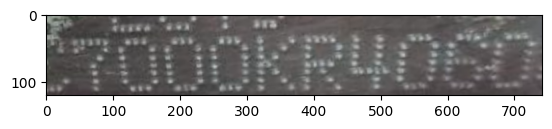

In [ ]:
plt.imshow(img)

2 / 308 instances have illegal characters.
text: y4srz


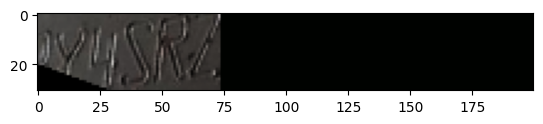

In [ ]:
image, text = next(training_image_gen)
print('text:', text)
_ = plt.imshow(image)

In [ ]:
image.shape

(31, 200, 3)

In [ ]:
training_image_gen

<generator object get_recognizer_image_generator at 0x7f2818784eb0>

In [ ]:
%%time
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, restore_best_weights=False),
    tf.keras.callbacks.ModelCheckpoint('recognizer_borndigital.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('recognizer_borndigital.csv')]

recognizer.training_model.fit_generator(
    generator=training_gen,
    steps_per_epoch=training_steps,
    validation_data=validation_gen,
    validation_steps=validation_steps,
    callbacks=callbacks,
    epochs=30  
    )


Epoch 1/30


<timed exec>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


ValueError: ignored

In [ ]:
dados['shapes'][0]['points']

[[559.155172413793, 74.75862068965517], [564.3275862068965, 80.79310344827587]]

1/1 [==============================] - 11s 11s/step
Predicted: isarlts, Actual: bwdb05u29t219423
1/1 [==============================] - 0s 26ms/step
Predicted: sa, Actual: brk19bt2d2011294
1/1 [==============================] - 0s 27ms/step
Predicted: 52s7567, Actual: 5267367
1/1 [==============================] - 0s 27ms/step
Predicted: sse, Actual: 95p
1/1 [==============================] - 0s 26ms/step
Predicted: do, Actual: no
1/1 [==============================] - 0s 25ms/step
Predicted: aeos, Actual: kb218226
1/1 [==============================] - 0s 27ms/step
Predicted: brusolos, Actual: 1bp9u962165
1/1 [==============================] - 0s 27ms/step
Predicted: alsliar, Actual: c2kd0810gr4
1/1 [==============================] - 0s 26ms/step
Predicted: abale, Actual: abaixo
1/1 [==============================] - 0s 27ms/step
Predicted: saobizn, Actual: 34500512005493
1/1 [==============================] - 0s 27ms/step
Predicted: eroree, Actual: proprie
1/1 [======================

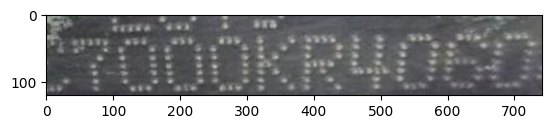

In [ ]:
qtd = len(validation_labels)
qtd_acertos = 0
qtd_erros = 0
for i in range(len(validation_labels)):

  image_filepath, _, actual = validation_labels[i]
  predicted = recognizer.recognize(validation_labels[i][0])
  print(f'Predicted: {predicted}, Actual: {actual}')
  plt.imshow(keras_ocr.tools.read(image_filepath))
  if(predicted == actual):
    qtd_acertos+= 1
  else:
    qtd_erros+=1

print("Acuracia: ",(qtd_acertos/qtd)*100 )
print("qtd acertos:", qtd_acertos)
print("qtd total:", qtd)

1/1 [==============================] - 0s 28ms/step
Predicted: abale, Actual: abaixo


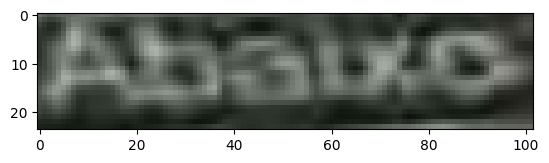

In [ ]:
i=8
image_filepath, _, actual = validation_labels[i]
predicted = recognizer.recognize(validation_labels[i][0])
print(f'Predicted: {predicted}, Actual: {actual}')
_ = plt.imshow(keras_ocr.tools.read(image_filepath))

In [ ]:
recognizer.model.save_weights(filepath='/content/gdrive/MyDrive/Projetos/Vistoria_Digital/Modelos/Chassi/chassi_Keras_OCR_v1/keras_ocr_reconhecedor_chassi_1.h5',save_format='h5')

In [ ]:
!pip install textdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import textdistance
qtd = len(validation_labels)
qtd_acertos = 0
qtd_erros = 0

for i in range(len(validation_labels)):

  image_filepath, _, actual = validation_labels[i]
  predicted = recognizer.recognize(validation_labels[i][0])
  similaridade = textdistance.levenshtein.normalized_similarity(predicted, actual)
  print(f'Actual: {actual}, Predicted: {predicted}, Similaridade: {similaridade}')
  if(similaridade >= 0.80):
    qtd_acertos +=1
  else:
    qtd_erros+=1
    img = cv2.imread(image_filepath)
    cv2_imshow(img)
print("Acuracia: ",(qtd_acertos/qtd)*100 )
print("qtd acertos:", qtd_acertos)
print("qtd total:", qtd)
